In [13]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [14]:
import scipy.stats as stats
import numpy.random as random
import scipy.interpolate as interpol
import scipy.integrate as integrate

# Test case for today: log-normal data

Let's create $10^6$ values distributed as a log-normal: $x \sim e^{N(0,1)}$

In [58]:
data=exp(random.randn(100_000))

__In the below code box, plot a histogram of the array `data` as one figure (using `plt.figure()`) and a histogram of the log of the data as a second figure.  Use 100 bins for each plot.__

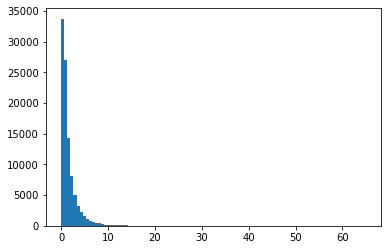

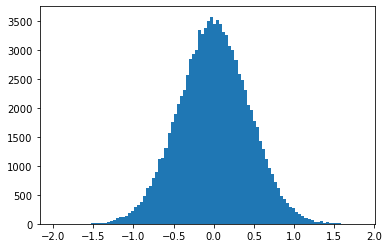

In [16]:
plt.hist(data,bins=100)
plt.show()
plt.hist(np.log10(data),bins=100)
plt.show()

Calculating the mean:

In [18]:
print(np.mean(data))
print( data.mean() )

1.650563743445527
1.650563743445527


Calculating the median:

In [19]:
print(np.median(data))

0.9980407917901364


Calculating the mode:

In [21]:
print(f'Unrounded: {stats.mode(data)}')

data_r = np.round(data,decimals=2)
print(f'Rounded: {stats.mode(data_r)}')

Unrounded: ModeResult(mode=array([0.01049772]), count=array([1]))
Rounded: ModeResult(mode=array([0.35]), count=array([693]))


In [22]:
bins = np.linspace(-0.005,10.005,1002)
counts,edges=np.histogram(data,bins=bins)
whmax=np.argmax(counts)
mode=(edges[whmax]+edges[whmax+1])/2
print(mode)

0.3500000000000001


## Creating a mode function

Let's define a function which can calculate the mode for any binning we might choose at the time we run it:

In [30]:
def mode2(data,**kwargs):
# note: provide bins and (optionally) range keywords 
# as used in np.histogram to not use the
# defaults of np.histogram (10 bins, full range)
    counts,edges=np.histogram(data,**kwargs)
    whmax=np.argmax(counts)
    mode=(edges[whmax]+edges[whmax+1])/2
    print(mode)
    return(mode)

__Use the `mode2` function to calculate the mode for at least 3 different binnings of the data (differing in bin sizes).__  Since we used `**kwargs` we can include the `bins=` keyword within the `mode2` function call, and it gets passed to `np.histogram`.

0.24477447744774478
0.30593186372745496
0.3014285714285715


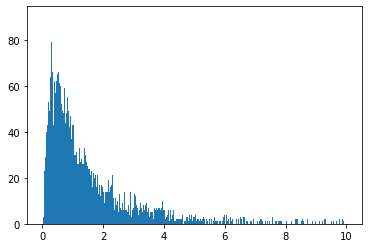

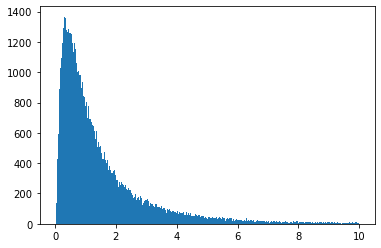

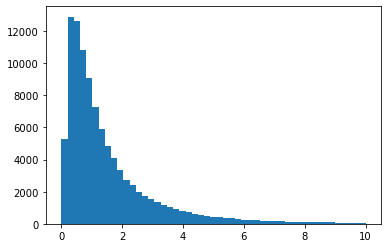

In [33]:
bins1 = np.linspace(-0.005,10.005,10000)
bins2 = np.linspace(-0.005,10.005,500)
bins3 = np.linspace(-0.005,10.005,50)

mode2(data,bins = bins1)
mode2(data,bins = bins2)
mode2(data,bins = bins3)

plt.hist(data,bins=bins1)
plt.show()
plt.hist(data,bins=bins2)
plt.show()
plt.hist(data,bins=bins3)
plt.show()

# Calculating measures of scale

First, the standard deviation:


In [56]:
print( np.std(data),np.std(data,ddof=1) )
print( np.std(log(data)),np.std(log(data),ddof=1) )

0.9999937610368673 0.9999938110365592
nan nan


/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


### Now, the mean absolute deviation.  

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [55]:
normmeanabsdev = np.mean(np.abs(data-data.mean()))/0.7979
mnlog = np.mean(np.log(data) )
normmeanabsdev_log = np.mean(np.abs( np.log(data)-mnlog) )/0.7979

print(f'Normalized Mean Absolute Deviation: {normmeanabsdev:.5f}')
print(f'Normalized Mean Absolute Deviation of log(data): {normmeanabsdev_log:.5f}')

Normalized Mean Absolute Deviation: 0.99988
Normalized Mean Absolute Deviation of log(data): nan


/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


### Calculating the MAD:

__Discuss with your group: why do these values agree or not with the standard deviation?__


In [50]:
meddata=np.median(data)
normmad = np.median(np.abs(data-meddata))/0.6745
normmad_log = np.median(abs(np.log(data)-np.log(meddata)))/0.6745


print(f'Normalized Median Absolute Deviation: {normmad:.5f}')
print(f'Normalized Mean Absolute Deviation of log(data): {normmad_log:.5f}')

Normalized Median Absolute Deviation: 0.89558
Normalized Mean Absolute Deviation of log(data): 1.00376


### Calculating the IQR:

__Discuss with your group: why do these values agree or not with the standard deviation?__

In [46]:
d25,d75 = np.percentile(data,[25,75])
normiqr = (d75-d25)/1.349
normiqr_log = (np.log(d75)-np.log(d25))/1.349


print(f'Normalized IQR: {normiqr:.5f}')
print(f'Normalized IQR of log(data): {normiqr_log:.5f}')

Normalized IQR: 0.99977
Normalized IQR of log(data): nan


/Users/yashakaushal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


# Results when averaging data together

In [51]:
nsims = int(1E5)
navg = 100
data = random.randn(nsims,navg)

# average each set of navg values
means=np.mean(data,axis=1)

- __Using the below code block, plot a histogram of the distribution of the means from each simulation, with binsize 0.01, over the range from -2 to +2 (what should you set the `bins` and `range` keywords to be for that?)__

- __Determine the standard deviation of the array of means__

(array([[57., 53., 61., ..., 58., 70., 57.],
        [50., 62., 45., ..., 62., 55., 54.],
        [53., 58., 62., ..., 68., 68., 53.],
        ...,
        [59., 46., 58., ..., 47., 46., 53.],
        [48., 48., 44., ..., 56., 61., 52.],
        [46., 47., 56., ..., 69., 56., 54.]]),
 array([-2.00000000e+00, -1.99000000e+00, -1.98000000e+00, -1.97000000e+00,
        -1.96000000e+00, -1.95000000e+00, -1.94000000e+00, -1.93000000e+00,
        -1.92000000e+00, -1.91000000e+00, -1.90000000e+00, -1.89000000e+00,
        -1.88000000e+00, -1.87000000e+00, -1.86000000e+00, -1.85000000e+00,
        -1.84000000e+00, -1.83000000e+00, -1.82000000e+00, -1.81000000e+00,
        -1.80000000e+00, -1.79000000e+00, -1.78000000e+00, -1.77000000e+00,
        -1.76000000e+00, -1.75000000e+00, -1.74000000e+00, -1.73000000e+00,
        -1.72000000e+00, -1.71000000e+00, -1.70000000e+00, -1.69000000e+00,
        -1.68000000e+00, -1.67000000e+00, -1.66000000e+00, -1.65000000e+00,
        -1.64000000e+00, -1.630

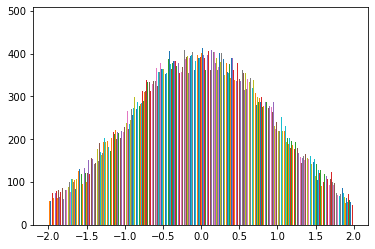

In [54]:
plt.hist(data,bins=np.arange(-2,2,0.01),range=[-2,2])

- __Now, in the above code box, create a second set of simulations with `navg` = 9.  Plot the histogram of results from these simulations on top of the histogram for averaging 100 measurements.__

__Discuss with your group: How do you explain the differences between the results (both qualitatively and quantitatively)? How does the scatter of the means scale with `navg`?__

array([[-0.08813319, -0.76233425, -0.52186952, ..., -1.20277869,
         0.57854575,  1.14891999],
       [ 2.15839366,  0.34597053,  0.27513276, ..., -1.04225525,
         0.43987768,  0.64234165],
       [-1.23795653,  0.16285457, -1.2144455 , ...,  0.68047052,
         0.75085976, -0.73500927],
       ...,
       [-1.67999883,  1.19843543, -1.50093829, ..., -1.14667774,
        -0.24301392, -0.59606842],
       [-0.0396136 , -0.81590005,  0.73152107, ..., -2.14146259,
         1.25678151, -0.53200636],
       [ 0.69165661,  0.48560851, -0.60399099, ..., -0.58192742,
        -0.99333088, -0.66112602]])